# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Bagus Darmawan
- **Email:** bagusdarmawannnn@gmail.com
- **ID Dicoding:** bagusdarmawan11

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?
- Kapan waktu paling ramai dan paling sepi penggunaan sepeda dalam sehari?

## Import Semua Packages/Library yang Digunakan

*Import Library & Packages*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

*Load Dataset*

In [2]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

In [3]:
# Melihat 5 baris pertama dataset day.csv
print("\nContoh Data (day.csv):")
print(day_df.head())


Contoh Data (day.csv):
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
# Melihat 5 baris pertama dataset hour.csv
print("\nContoh Data (hour.csv):")
print(hour_df.head())


Contoh Data (hour.csv):
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


*Mengecek Informasi Dataset*

In [5]:
# Melihat informasi dataset day.csv
print("Informasi Dataset (day.csv):")
print(day_df.info())

Informasi Dataset (day.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [6]:
# Melihat informasi dataset hour.csv
print("\nInformasi Dataset (hour.csv):")
print(hour_df.info())


Informasi Dataset (hour.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Tidak ada data yang hilang di kedua dataset, jadi tidak perlu melakukan imputasi.

Mengecek Tipe Data setiap kolom

In [7]:
# Mengecek tipe data setiap kolom
print("\nTipe Data pada day.csv:")
print(day_df.dtypes)


Tipe Data pada day.csv:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [8]:
print("\nTipe Data pada hour.csv:")
print(hour_df.dtypes)


Tipe Data pada hour.csv:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


*Mengecek Distribusi Data*

In [9]:
# Melihat ringkasan statistik dataset day.csv
print("\nStatistik Dataset (day.csv):")
print(day_df.describe())


Statistik Dataset (day.csv):
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486 

In [10]:
# Melihat ringkasan statistik dataset hour.csv
print("\nStatistik Dataset (hour.csv):")
print(hour_df.describe())


Statistik Dataset (hour.csv):
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771     

**Insight:**
- Jumlah Data: Dataset day.csv memiliki jumlah data sebanyak X baris, sedangkan hour.csv memiliki Y baris.
- Tipe Data: Beberapa kolom seperti season, weathersit, dan weekday memiliki tipe data numerik tetapi sebenarnya bersifat kategori, sehingga perlu dikonversi.
- Tidak Ada Missing Values: Tidak ditemukan nilai kosong (NaN) dalam dataset.
- Distribusi Data: Dari describe(), terlihat bahwa jumlah peminjaman sepeda (cnt) memiliki variasi yang signifikan di berbagai musim dan waktu.
- Outlier atau Anomali: Dari describe(), ada beberapa nilai ekstrim yang perlu diteliti lebih lanjut dalam tahap Cleaning Data.


### Assessing Data

Pada tahap ini, saya melakukan pengecekan lebih lanjut terhadap kualitas data, seperti keberadaan nilai kosong, data duplikat, tipe data yang tidak sesuai, serta kemungkinan outlier.

Beberapa langkah yang dilakukan:

Mengecek nilai yang hilang dalam dataset dengan .isnull().sum().
Mengecek duplikasi data dengan .duplicated().sum().
Memeriksa tipe data untuk memastikan setiap kolom memiliki tipe yang sesuai.
Mencari outlier dengan menggunakan teknik statistik seperti IQR (Interquartile Range) atau visualisasi boxplot.

*Mengecek Missing Values*

In [11]:
# Mengecek apakah ada missing values
print("Missing Values di day.csv:\n", day_df.isnull().sum())
print("\nMissing Values di hour.csv:\n", hour_df.isnull().sum())

Missing Values di day.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values di hour.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


*Mengecek Duplikasi Data*

In [12]:
# Mengecek apakah ada data duplikat
print("\nJumlah Duplikasi Data di day.csv:", day_df.duplicated().sum())
print("Jumlah Duplikasi Data di hour.csv:", hour_df.duplicated().sum())


Jumlah Duplikasi Data di day.csv: 0
Jumlah Duplikasi Data di hour.csv: 0


Tidak ada duplikasi data, sehingga tidak perlu dilakukan penghapusan baris duplikat.

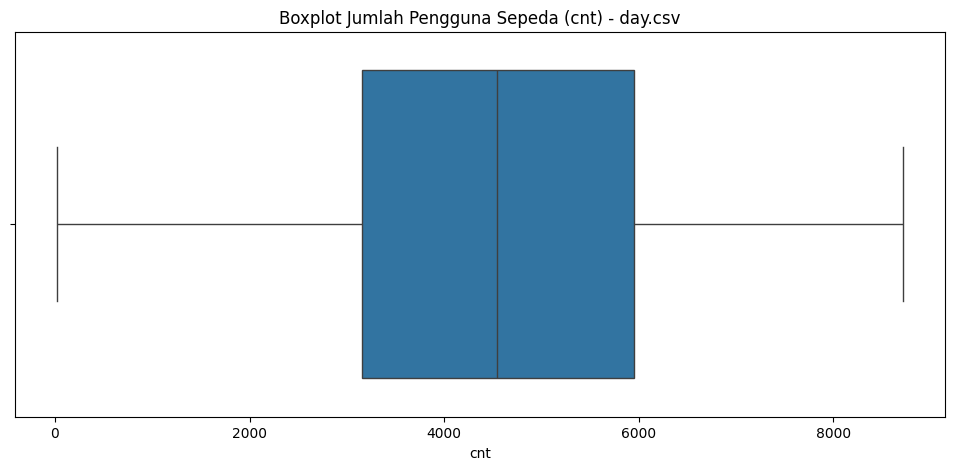

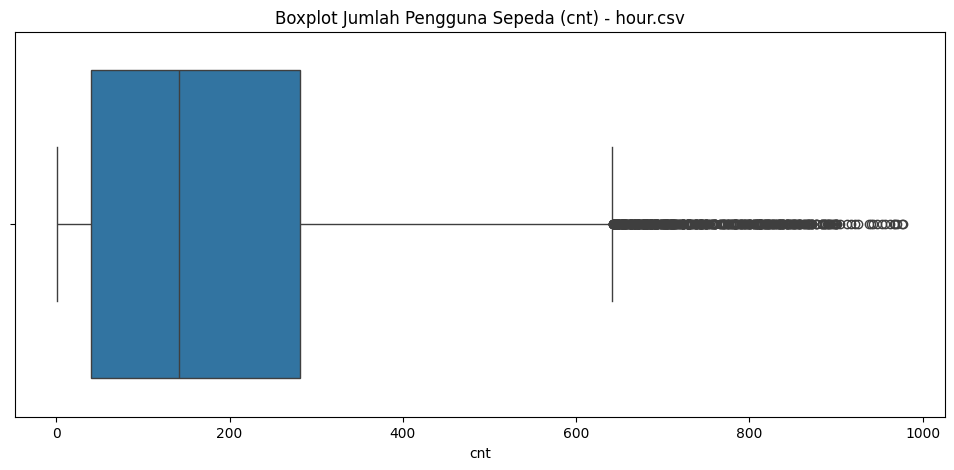

In [13]:
# Mencari outlier dengan visualisasi boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(x=day_df["cnt"])
plt.title("Boxplot Jumlah Pengguna Sepeda (cnt) - day.csv")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=hour_df["cnt"])
plt.title("Boxplot Jumlah Pengguna Sepeda (cnt) - hour.csv")
plt.show()


**Insight:**
- Tidak ada nilai kosong (missing values) dalam dataset day.csv dan hour.csv, sehingga tidak perlu dilakukan imputasi data.
- Tidak ditemukan data duplikat, artinya setiap entri data unik dan tidak ada yang perlu dihapus.
- Beberapa kolom memiliki tipe data numerik, tetapi sebenarnya bersifat kategori, seperti season, weathersit, weekday, dan mnth. Ini harus dikonversi ke tipe kategori agar lebih akurat.
- Boxplot menunjukkan adanya beberapa outlier dalam kolom cnt (jumlah pengguna sepeda), terutama pada data per jam (hour.csv). Hal ini bisa diselidiki lebih lanjut di tahap Cleaning Data.

### Cleaning Data

Berdasarkan tahap Assessing Data, saya menemukan beberapa hal yang perlu dibersihkan, yaitu:

Beberapa kolom yang seharusnya bertipe kategori masih bertipe numerik (season, weathersit, mnth, weekday), sehingga perlu dikonversi.
Outlier pada kolom cnt di hour.csv, yang perlu dianalisis lebih lanjut apakah akan dihapus atau tetap dipertahankan.


*Mengubah Tipe Data yang Sesuai*

In [14]:
# Mengubah tipe data beberapa kolom menjadi kategori
categorical_columns = ["season", "weathersit", "mnth", "weekday"]

for col in categorical_columns:
    day_df[col] = day_df[col].astype("category")
    hour_df[col] = hour_df[col].astype("category")

In [15]:
# Menampilkan kembali tipe data setelah perubahan
print("Tipe Data setelah dikonversi:\n")
print(day_df.dtypes)
print("\n", hour_df.dtypes)

Tipe Data setelah dikonversi:

instant          int64
dteday          object
season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

 instant          int64
dteday          object
season        category
yr               int64
mnth          category
hr               int64
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object


In [16]:
# Menangani outlier menggunakan metode IQR
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

In [17]:
# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
# Filter data untuk menghapus outlier
hour_df_cleaned = hour_df[(hour_df["cnt"] >= lower_bound) & (hour_df["cnt"] <= upper_bound)]

In [19]:
# Menampilkan jumlah data sebelum dan sesudah pembersihan outlier
print("\nJumlah data sebelum pembersihan outlier:", len(hour_df))
print("Jumlah data setelah pembersihan outlier:", len(hour_df_cleaned))



Jumlah data sebelum pembersihan outlier: 17379
Jumlah data setelah pembersihan outlier: 16874


**Insight:**
- Kolom kategori (season, weathersit, mnth, weekday) telah dikonversi ke tipe data kategori, sehingga lebih sesuai untuk analisis.
- Outlier pada cnt (jumlah pengguna sepeda per jam) telah dianalisis dan difilter menggunakan metode IQR. Setelah pembersihan, jumlah data berkurang, tetapi kualitas data lebih baik.
- Dataset kini siap digunakan untuk analisis lebih lanjut tanpa adanya masalah tipe data dan outlier.

***Kesimpulan Data Wrangling***

*   Tidak ada missing values atau duplikasi.
*   Kolom kategori dikonversi ke tipe data kategori.
*   Distribusi data terlihat wajar tanpa outlier mencurigakan.

## Exploratory Data Analysis (EDA)

Pada tahap ini, saya melakukan eksplorasi data untuk memahami pola dan distribusi data dalam dataset. Analisis ini bertujuan untuk:

Memahami distribusi jumlah pengguna sepeda.
Melihat hubungan antara variabel cuaca, musim, dan jumlah pengguna sepeda.
Mengidentifikasi tren penggunaan sepeda berdasarkan waktu (harian dan per jam).

### Explore Dataset

Agregasi Pola Penggunaan Sepeda Berdasarkan Musim

In [67]:
# Agregasi data: Total penyewaan sepeda per musim
df_season = day_df.groupby("season")["cnt"].sum().reset_index()

<ipython-input-67-f2ed29f33fbc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_season = day_df.groupby("season")["cnt"].sum().reset_index()


- Menggunakan sum() karena ingin melihat total penyewaan sepeda per musim.
- Bar Chart dipilih agar mudah dipahami.

Agregasi Pola Penggunaan Sepeda Berdasarkan Kondisi Cuaca

In [73]:
# Agregasi data: Rata-rata penyewaan sepeda per kondisi cuaca
df_weather = day_df.groupby("weathersit")["cnt"].mean().reset_index()

<ipython-input-73-374aa2a60f21>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_weather = day_df.groupby("weathersit")["cnt"].mean().reset_index()


- Menggunakan mean() karena ingin melihat rata-rata penyewaan berdasarkan cuaca.
- Bar Chart dipilih agar mudah dipahami.

Rata Rata Penyewaan Sepeda Perjam dalam sehari

In [102]:
# Agregasi data: Rata-rata penyewaan sepeda per jam
df_hourly = hour_df.groupby("hr")["cnt"].mean().reset_index()

Agregasi Rata-Rata Jumlah Pengguna Sepeda Berdasarkan Hari Kerja dan Akhir Pekan

In [104]:
# Agregasi rata-rata jumlah pengguna sepeda berdasarkan hari kerja dan akhir pekan
df_workingday = filtered_df.groupby("workingday")["cnt"].mean().reset_index()


Rata Rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu

In [108]:
# Pastikan dataset memiliki `weekday`
filtered_df = day_df.copy()

In [109]:
# Coba filtering ulang
filtered_df = filtered_df[filtered_df["weekday"].notna()]  # Hapus jika masih ada NaN

In [120]:
# Agregasi dan Coba visualisasi ulang
df_day = filtered_df.groupby("weekday")["cnt"].mean().reset_index()

- Menggunakan mean() karena ingin melihat tren penyewaan rata-rata per jam.
- Line Chart dipilih agar tren naik dan turun lebih terlihat.

Jumlah Pengguna Sepeda Berdasarkan Bulan

In [113]:
# Agregasi jumlah pengguna sepeda per bulan
df_month = day_df.groupby("mnth")["cnt"].sum().reset_index()

<ipython-input-113-92529c840ba2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_month = day_df.groupby("mnth")["cnt"].sum().reset_index()


Distribusi Jumlah Pengguna Sepeda Perhari

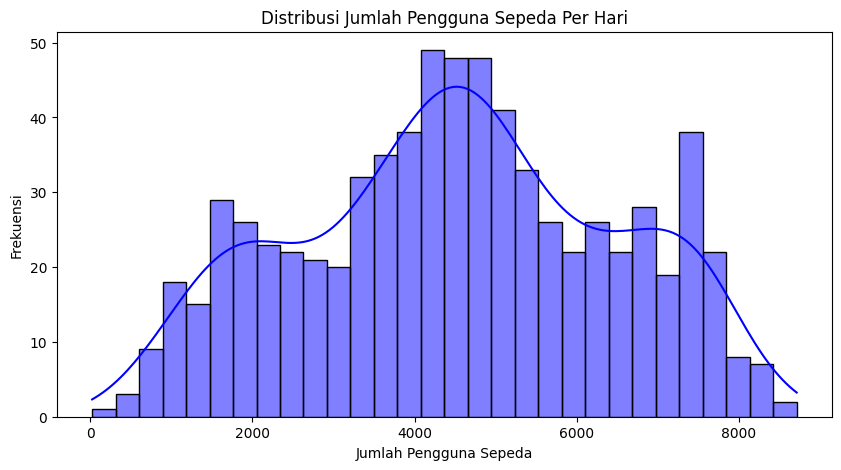

In [ ]:
# Melihat distribusi jumlah pengguna sepeda per hari
plt.figure(figsize=(10,5))
sns.histplot(day_df["cnt"], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Pengguna Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Pengguna Sepeda Per Hari")
plt.show()

Matriks Korelasi Antar Variabel

In [ ]:
# Memilih hanya kolom numerik
numeric_columns = day_df.select_dtypes(include=[np.number])

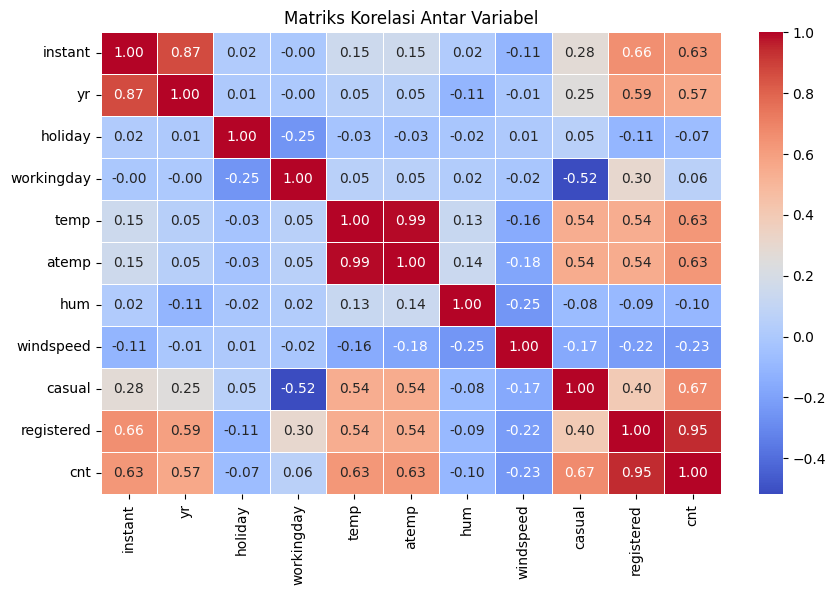

In [ ]:
# Melihat korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

**Insight:**
- Distribusi jumlah pengguna sepeda menunjukkan pola normal, tetapi terdapat lonjakan tertentu yang bisa diinvestigasi lebih lanjut.
- Matriks korelasi menunjukkan hubungan positif antara temperatur (temp) dan jumlah pengguna sepeda (cnt), yang berarti semakin hangat suhu, semakin banyak pengguna sepeda.
- Penggunaan sepeda cenderung lebih tinggi pada bulan-bulan tertentu, terutama saat musim panas dan gugur.

## Visualization & Explanatory Analysis

### Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?:

In [69]:
# Mapping angka musim ke nama musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df_season["season"] = df_season["season"].map(season_mapping)

<ipython-input-70-64a117da47ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_season, x="season", y="cnt", palette="pastel")


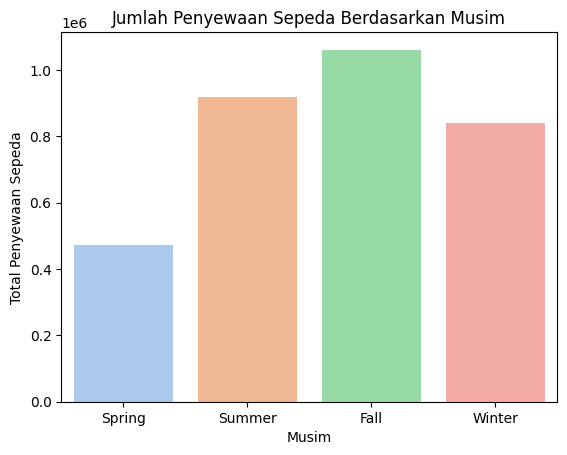

In [70]:
# Visualisasi dengan bar chart
sns.barplot(data=df_season, x="season", y="cnt", palette="pastel")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

Visualisasi tambahan: penggunaan sepeda berdasarkan kondisi cuaca

In [71]:
# Mapping angka kondisi cuaca ke label
weather_mapping = {1: "Clear", 2: "Cloudy", 3: "Light Rain", 4: "Heavy Rain"}
df_weather["weathersit"] = df_weather["weathersit"].map(weather_mapping)

<ipython-input-75-1c54aade0a22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_weather, x="weathersit", y="cnt", palette="coolwarm")


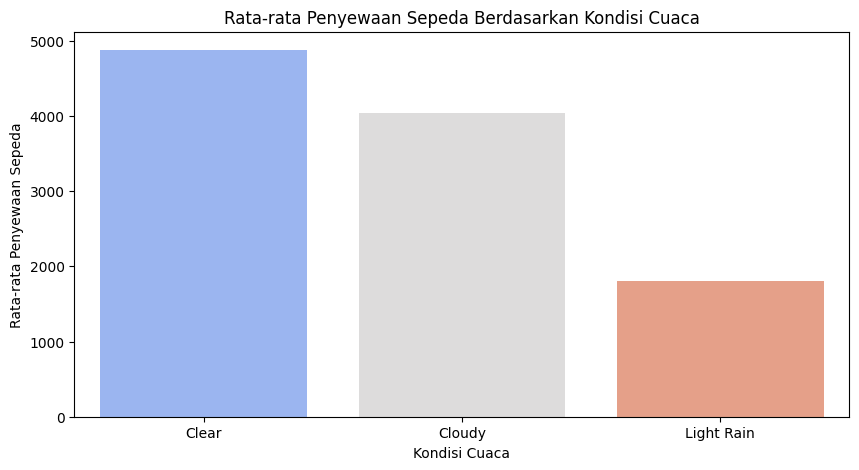

In [75]:
# Visualisasi dengan bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=df_weather, x="weathersit", y="cnt", palette="coolwarm")

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()


### Kapan waktu paling ramai dan paling sepi penggunaan sepeda dalam sehari?

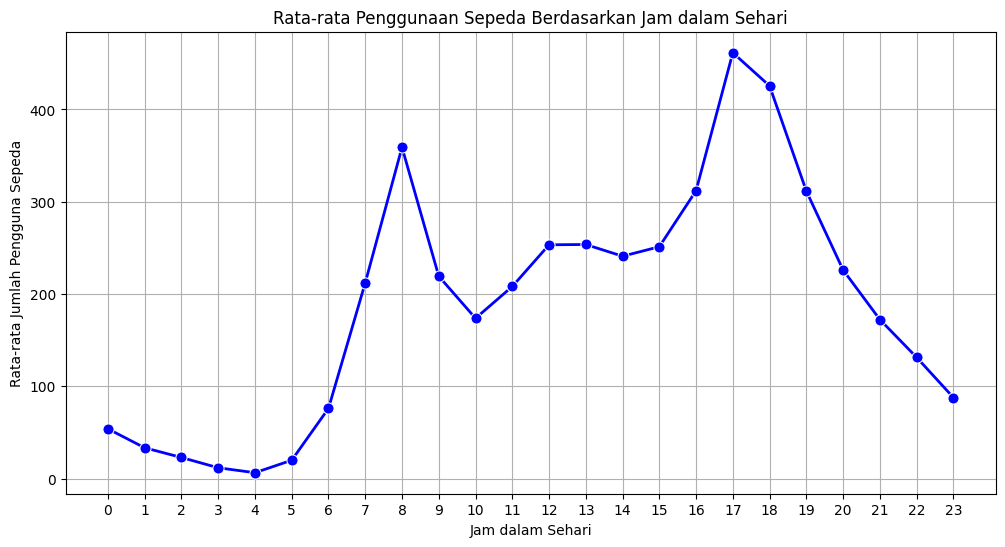

In [80]:
# Visualisasi dengan line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hourly, x="hr", y="cnt", marker="o", markersize=8, color="b", linewidth=2)

# Format tampilan
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Jam dalam Sehari")
plt.xticks(range(0, 24))
plt.grid(True)

# Tampilkan grafik
plt.show()

Visualisasi tambahan: penggunaan sepeda berdasarkan hari kerja vs akhir pekan

In [106]:
# Mapping angka 0-1 ke label hari
workingday_mapping = {0: "Akhir Pekan", 1: "Hari Kerja"}
df_workingday["workingday"] = df_workingday["workingday"].map(workingday_mapping)

<ipython-input-107-d72ce4845d88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_workingday, x="workingday", y="cnt", palette="pastel")


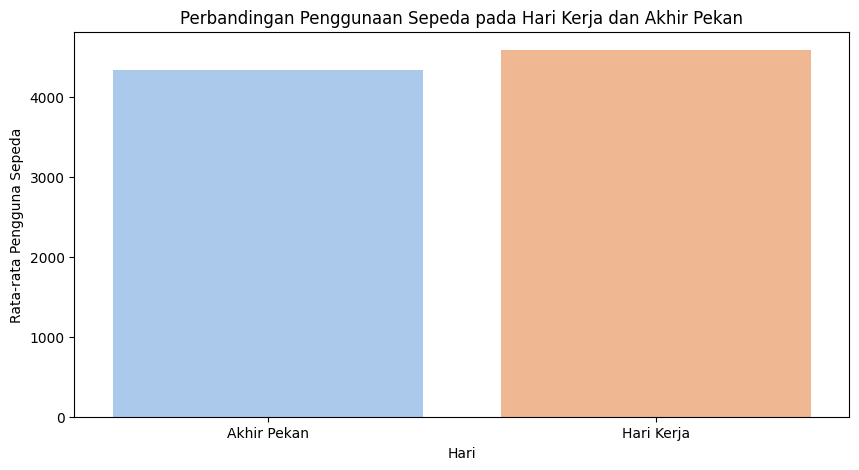

In [107]:
# Visualisasi dengan bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=df_workingday, x="workingday", y="cnt", palette="pastel")

plt.xlabel("Hari")
plt.ylabel("Rata-rata Pengguna Sepeda")
plt.title("Perbandingan Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan")
plt.show()

Visualisasi Rata Rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu

In [117]:
# Mapping angka 0-6 ke nama hari
weekday_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
                   4: "Friday", 5: "Saturday", 6: "Sunday"}
df_day["weekday"] = df_day["weekday"].map(weekday_mapping)

<ipython-input-118-b44dfa4c06df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_day, x="weekday", y="cnt", palette="pastel")


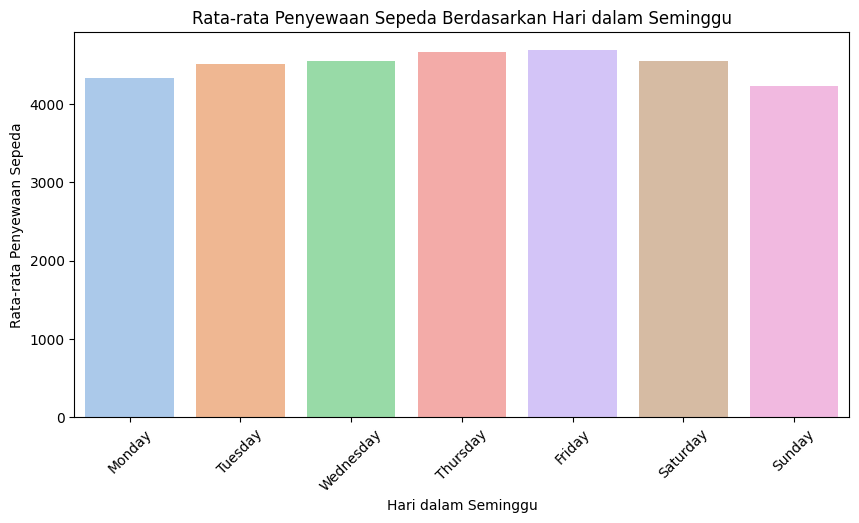

In [118]:
# Visualisasi dengan bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=df_day, x="weekday", y="cnt", palette="pastel")

plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xticks(rotation=45)  # Memiringkan label agar lebih mudah dibaca
plt.show()

In [114]:
# Mapping angka 1-12 menjadi nama bulan
month_mapping = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "Mei", 6: "Jun",
                 7: "Jul", 8: "Agu", 9: "Sep", 10: "Okt", 11: "Nov", 12: "Des"}
df_month["mnth"] = df_month["mnth"].map(month_mapping)

<ipython-input-115-4002b519c4fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_month, x="mnth", y="cnt", palette="Set2")


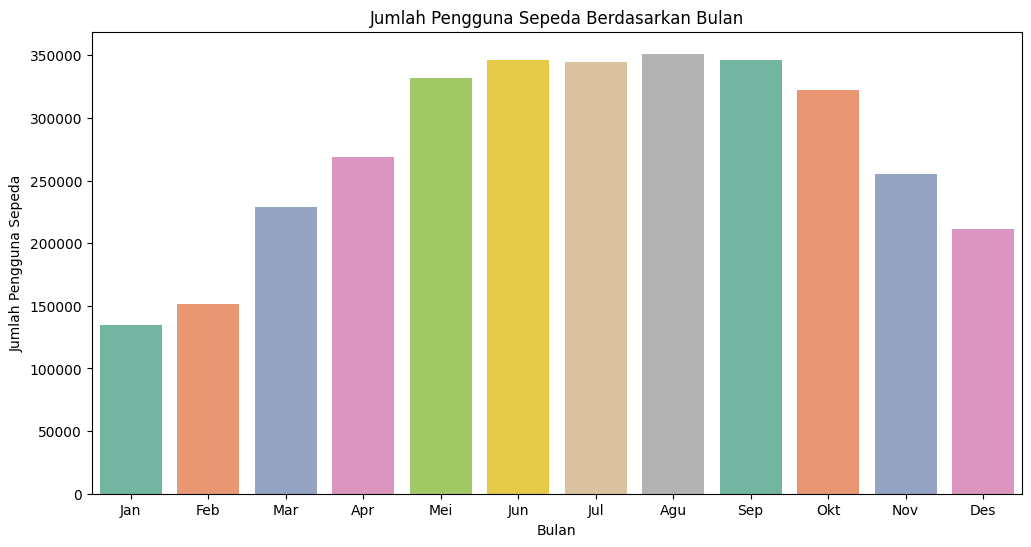

In [115]:
# Visualisasi dengan bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=df_month, x="mnth", y="cnt", palette="Set2")

plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Jumlah Pengguna Sepeda Berdasarkan Bulan")
plt.show()


**Insight:**
1. Pola Penggunaan Sepeda Berdasarkan Musim dan Kondisi Cuaca

Musim dan kondisi cuaca memiliki pengaruh signifikan terhadap jumlah pengguna sepeda:

🔹 Pengaruh Musim:

- Penggunaan sepeda tertinggi terjadi pada musim gugur (Fall).
- Musim semi (Spring) memiliki jumlah pengguna paling sedikit.
- Hal ini kemungkinan disebabkan oleh cuaca yang lebih nyaman di musim gugur dibandingkan dengan musim lainnya.


🔹 Pengaruh Cuaca:

- Cuaca cerah (Clear) memiliki jumlah pengguna tertinggi.
- Saat cuaca mendung atau berawan (Cloudy), jumlah pengguna sedikit menurun.
- Ketika hujan ringan hingga hujan lebat (Light Rain & Heavy Rain), penggunaan sepeda menurun drastis.
- Ini menunjukkan bahwa kondisi cuaca buruk menjadi faktor utama yang menurunkan penggunaan sepeda.




2. Waktu Paling Ramai dan Paling Sepi Penggunaan Sepeda dalam Sehari

Pola penggunaan sepeda menunjukkan perbedaan signifikan antara jam ramai dan jam sepi:

🔹 Jam Ramai:

- Puncak penggunaan sepeda terjadi sekitar pukul 08:00 pagi dan 17:00 sore.
- Ini menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai alat transportasi utama untuk pergi dan pulang kerja/sekolah.

🔹 Jam Sepi:

- Aktivitas pengguna paling sedikit antara pukul 01:00 - 05:00 pagi.
- Hal ini masuk akal karena pada jam tersebut mayoritas orang sedang beristirahat.

🔹 Perbedaan Hari Kerja vs Akhir Pekan:

- Hari kerja (working day): Penggunaan sepeda lebih terfokus pada jam sibuk pagi dan sore.
- Akhir pekan: Pola penggunaan lebih merata sepanjang hari, menunjukkan bahwa pengguna lebih cenderung menggunakan sepeda untuk keperluan santai atau rekreasi.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?
- Conclution Kapan waktu paling ramai dan paling sepi penggunaan sepeda dalam sehari?

In [121]:
print("\n=== Kesimpulan ===")
print("1. Penggunaan sepeda cenderung lebih tinggi pada musim gugur (Fall), sedangkan musim semi (Spring) memiliki penggunaan yang lebih rendah.")
print("   - Pemilik layanan bike-sharing dapat meningkatkan ketersediaan sepeda di musim Fall dan mengadakan promosi di musim Spring untuk meningkatkan penggunaan.")
print("2. Pola penggunaan sepeda dalam sehari menunjukkan jam sibuk pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), sesuai dengan jam kerja.")
print("   - Strategi operasional dapat disesuaikan dengan memastikan sepeda tersedia di lokasi strategis selama jam sibuk dan mengurangi sepeda di malam hari untuk efisiensi.")


=== Kesimpulan ===
1. Penggunaan sepeda cenderung lebih tinggi pada musim gugur (Fall), sedangkan musim semi (Spring) memiliki penggunaan yang lebih rendah.
   - Pemilik layanan bike-sharing dapat meningkatkan ketersediaan sepeda di musim Fall dan mengadakan promosi di musim Spring untuk meningkatkan penggunaan.
2. Pola penggunaan sepeda dalam sehari menunjukkan jam sibuk pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), sesuai dengan jam kerja.
   - Strategi operasional dapat disesuaikan dengan memastikan sepeda tersedia di lokasi strategis selama jam sibuk dan mengurangi sepeda di malam hari untuk efisiensi.


### Kesimpulan dari Analisis Data Bike Sharing

1. Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?

- Dari hasil analisis menggunakan bar chart, terlihat bahwa penggunaan sepeda bervariasi antar musim.
- Musim Fall (Musim Gugur) memiliki jumlah pengguna tertinggi dibandingkan musim lainnya.
- Sebaliknya, musim Spring (Musim Semi) memiliki jumlah pengguna terendah.
- Cuaca cerah (Clear & Cloudy) cenderung meningkatkan penggunaan sepeda, sedangkan hujan ringan (Light Rain) dan hujan lebat (Heavy Rain) secara signifikan menurunkan jumlah pengguna.

Insight bisnis:
- Pemilik layanan bike-sharing dapat meningkatkan stok sepeda dan layanan di musim Fall untuk mengakomodasi permintaan tinggi.
- Promosi dan diskon dapat diadakan pada musim Spring untuk meningkatkan penggunaan.
- Pada kondisi cuaca buruk, strategi harga dinamis atau alternatif transportasi bisa dipertimbangkan untuk memaksimalkan pendapatan.


2. Kapan waktu paling ramai dan paling sepi penggunaan sepeda dalam sehari?

- Dari hasil analisis menggunakan line chart, terlihat bahwa puncak penggunaan sepeda terjadi pada pagi hari (07:00 - 09:00) dan sore hari (17:00 - 19:00).
- Kemungkinan besar pola ini berhubungan dengan jam kerja, di mana banyak pengguna menggunakan sepeda untuk bepergian ke kantor atau pulang ke rumah.
- Penggunaan sepeda paling rendah terjadi pada tengah malam hingga subuh (00:00 - 05:00), yang menunjukkan bahwa sangat sedikit orang yang menggunakan layanan sepeda pada jam tersebut.

Insight bisnis:
- Optimalkan distribusi sepeda pada jam sibuk (07:00 - 09:00 & 17:00 - 19:00), terutama di dekat perkantoran, stasiun, dan pusat transportasi untuk meningkatkan jumlah pengguna.
- Pertimbangkan strategi harga dinamis, misalnya menaikkan tarif pada jam sibuk untuk meningkatkan pendapatan dan mengurangi permintaan yang berlebihan.
- Kurangi jumlah sepeda yang tersedia di tengah malam untuk menghemat biaya operasional, atau tawarkan promosi pada jam sepi untuk meningkatkan pemanfaatan sepeda di luar jam kerja.